#### Load Libraries

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [47]:
from Modules import dataload
from Modules import missing_values, duplicates, remove_duplicates
from Modules import plot_distribution, plot_lag, plot_autocorrelation, plot_moving_average 
from Modules import plot_multiline_chart, plot_price_return, plot_several_moving_averages, plot_rate_of_change
from Modules import plot_seasonal_decomposition,plot_auto_reg_diagnostics
from Modules import adfuller_test, convert_to_stationary, prepare_prophet_data, prepare_lstm_data
from Modules import prophet_model, lstm_model, plot_lstm_results, fit_auto_reg, fit_auto_reg_cov_HC0

#### Load and understand data

In [48]:
# Loading Dataset
df_train = dataload("./data/Uniqlo(FastRetailing) 2012-2016 Training - stocks2012-2016.csv")
df_test = dataload("./data/Uniqlo(FastRetailing) 2017 Test - stocks2017.csv")

# check first five rows of the data
df_train.head()

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
1,2016-12-29,43000,43220,42540,42660,448400,19188227000
2,2016-12-28,43940,43970,43270,43270,339900,14780670000
3,2016-12-27,43140,43700,43140,43620,400100,17427993000
4,2016-12-26,43310,43660,43090,43340,358200,15547803000


In [49]:
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_test['Date'] = pd.to_datetime(df_test['Date'])

# index the data with date
df_train.index = df_train['Date']
df_test.index = df_test['Date']

# Check first five rows of the data
df_train.head()

,Date,Open,High,Low,Close,Volume,Stock Trading
Date,,,,,,,
2016-12-30,2016-12-30,42120,42330,41700,41830,610000,25628028000
2016-12-29,2016-12-29,43000,43220,42540,42660,448400,19188227000
2016-12-28,2016-12-28,43940,43970,43270,43270,339900,14780670000
2016-12-27,2016-12-27,43140,43700,43140,43620,400100,17427993000
2016-12-26,2016-12-26,43310,43660,43090,43340,358200,15547803000


### Exploratory Data Analysis

In [50]:
# shape of the dataset
print("Shape of the train dataset is:", df_train.shape)
print("Shape of the test dataset is:", df_test.shape)

Shape of the train dataset is: (1226, 7)
Shape of the test dataset is: (7, 7)


In [51]:
# checking info of dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1226 entries, 2016-12-30 to 2012-01-04
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1226 non-null   datetime64[ns]
 1   Open           1226 non-null   int64         
 2   High           1226 non-null   int64         
 3   Low            1226 non-null   int64         
 4   Close          1226 non-null   int64         
 5   Volume         1226 non-null   int64         
 6   Stock Trading  1226 non-null   int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 76.6 KB


In [52]:
# Checking null values
missing_values(df_train) 

Date             0
Open             0
High             0
Low              0
Close            0
Volume           0
Stock Trading    0
dtype: int64

In [53]:
# Checking statistical properties of data
df_train.describe()

,Open,High,Low,Close,Volume,Stock Trading
count,1226.000000,1226.000000,1226.000000,1226.000000,1.226000e+03,1.226000e+03
mean,33754.416803,34178.784666,33347.903752,33760.583197,7.275556e+05,2.440933e+10
std,10813.440409,10936.326802,10695.664102,10815.661389,4.137178e+05,1.526300e+10
min,13720.000000,13840.000000,13600.000000,13720.000000,1.391000e+05,3.966140e+09
25%,27788.750000,28091.250000,27401.250000,27675.000000,4.873000e+05,1.454097e+10
50%,34445.000000,34835.000000,33925.000000,34412.500000,6.260000e+05,2.153772e+10
75%,41412.500000,41900.000000,40810.000000,41365.000000,8.267000e+05,3.015922e+10
max,61550.000000,61970.000000,60740.000000,61930.000000,4.937300e+06,1.460450e+11


### Data visualization

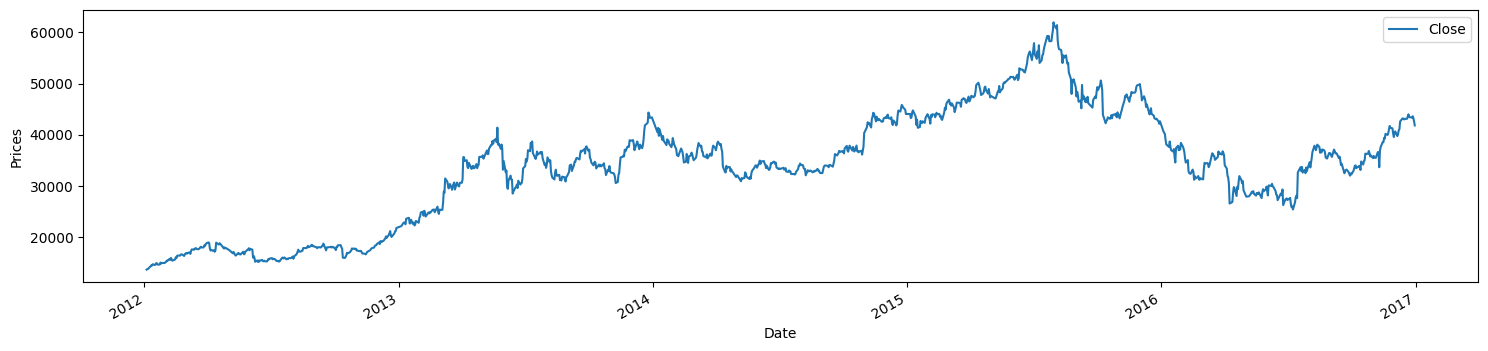

In [54]:
# Plotting distribution for Close
plot_distribution(df_train, 'Close')


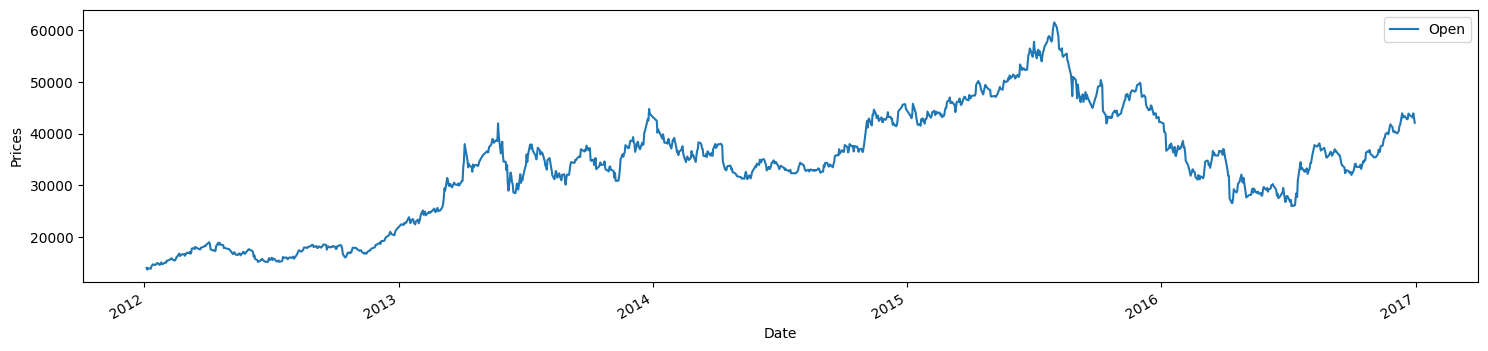

In [55]:
# Plotting distribution for Open
plot_distribution(df_train, 'Open')

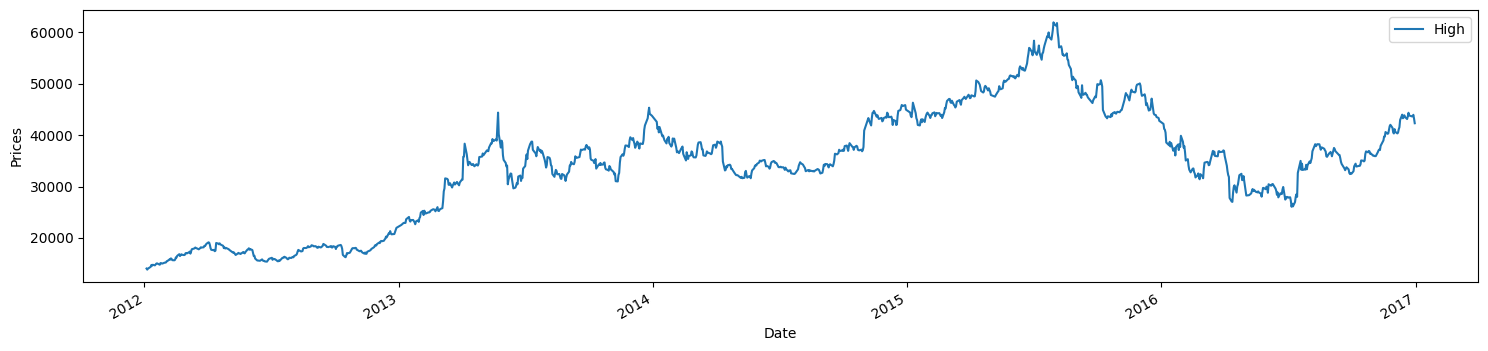

In [56]:
# Plotting distribution for High
plot_distribution(df_train, 'High')

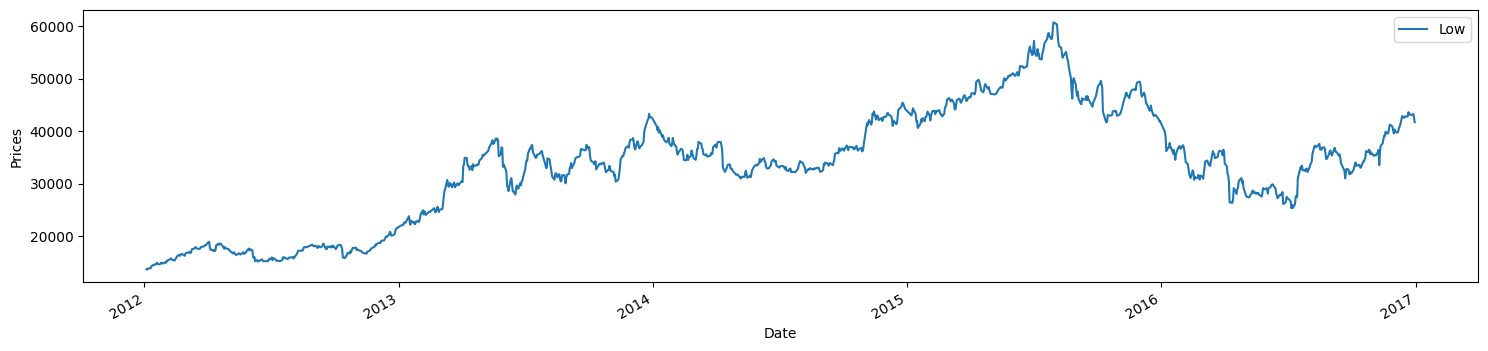

In [57]:
# Plotting distribution for Low
plot_distribution(df_train, 'Low')

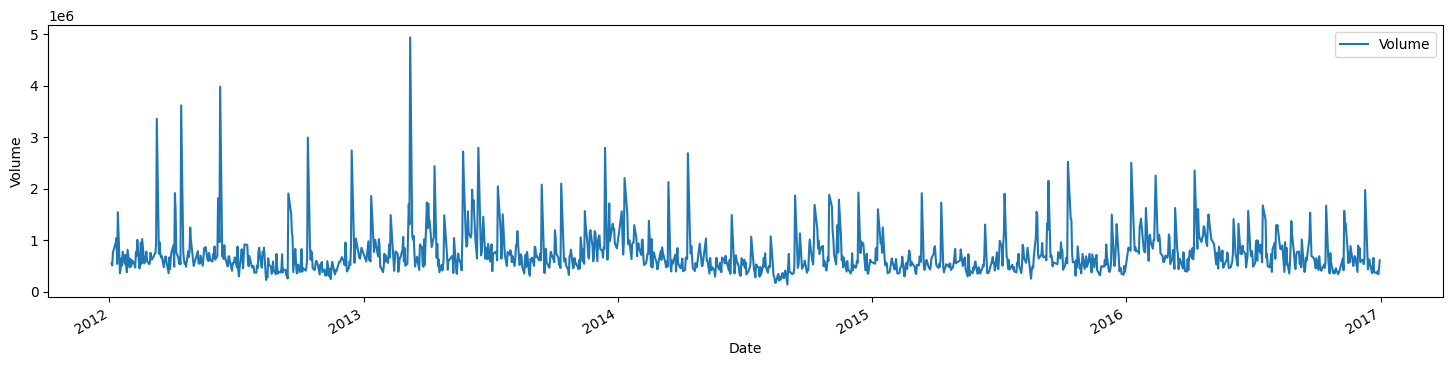

In [58]:
# Plotting distribution for Volume
plot_distribution(df_train, 'Volume',ylabel='Volume')

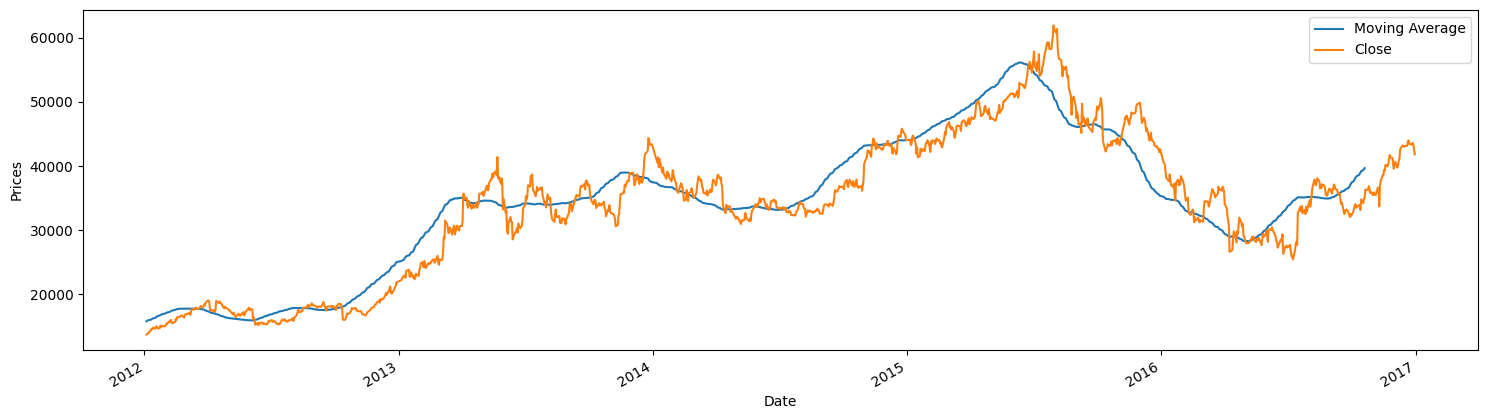

In [59]:
# Moving Averages
plot_moving_average(df_train, 'Close')

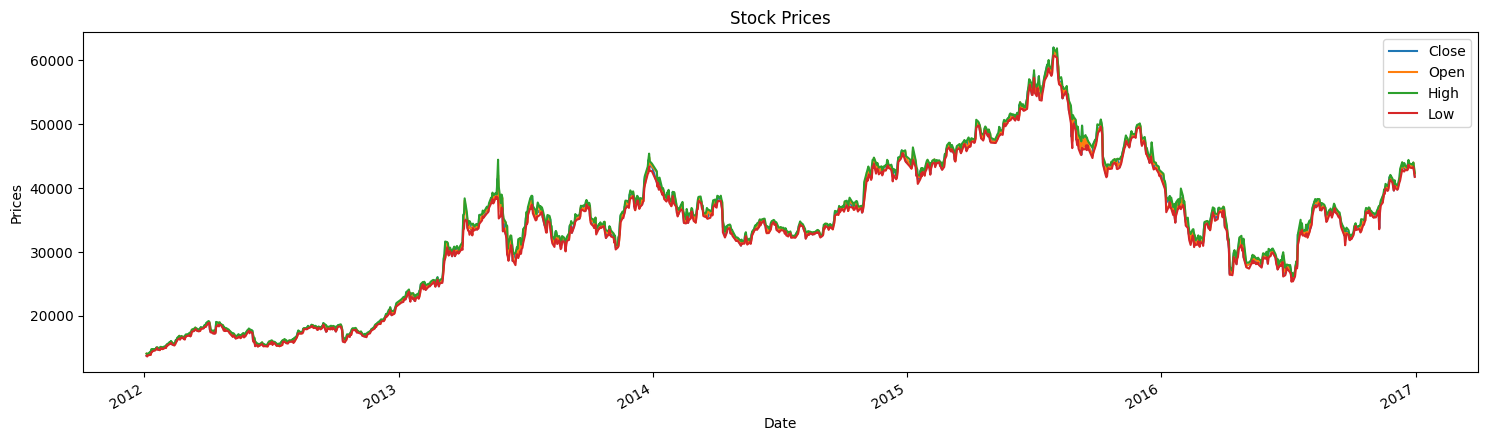

In [60]:
# Multiline plot for Close, Open, High and Low
plot_multiline_chart(df_train, ['Close', 'Open', 'High', 'Low'])

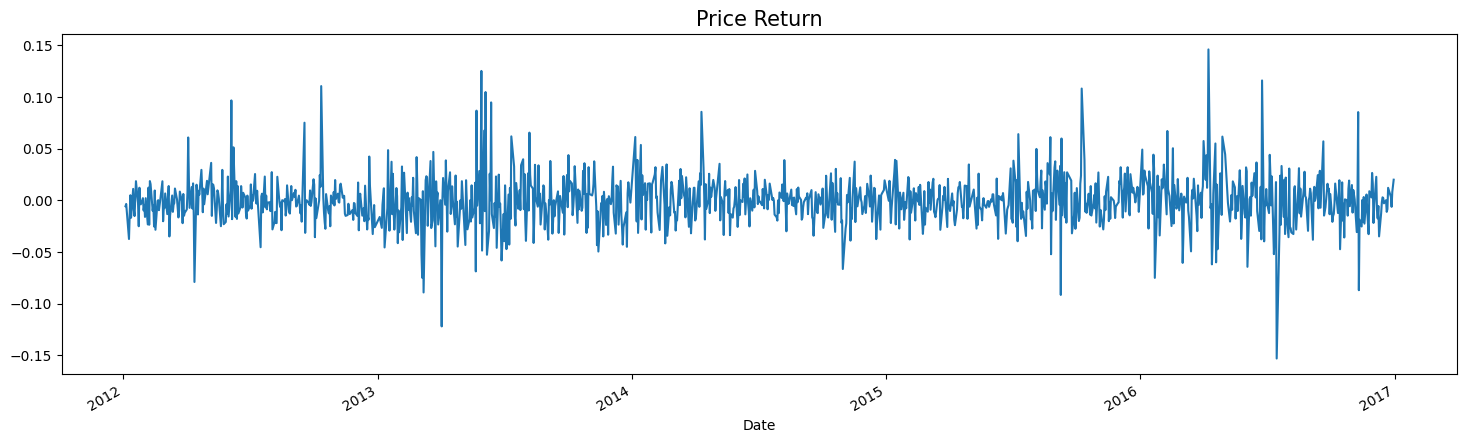

In [61]:
# Price Returen 
plot_price_return(df_train, 'Close')

<Axes: xlabel='Date'>

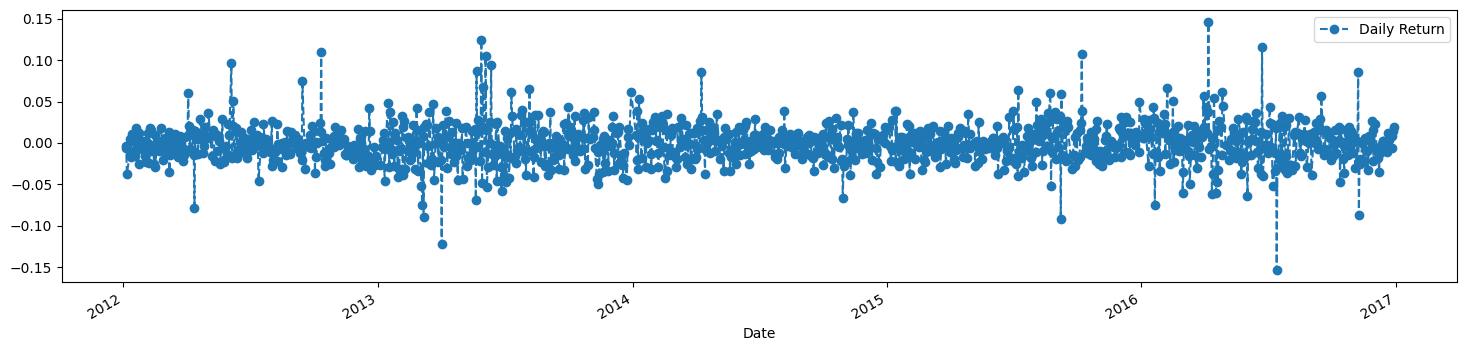

In [62]:
# pct_change is used to find the percent change for each day
df_train['Daily Return'] = df_train['Close'].pct_change()

# Lets plot the daily return percentage
df_train['Daily Return'].plot(figsize=(18,4), legend=True, linestyle='--', marker='o')

<Axes: >

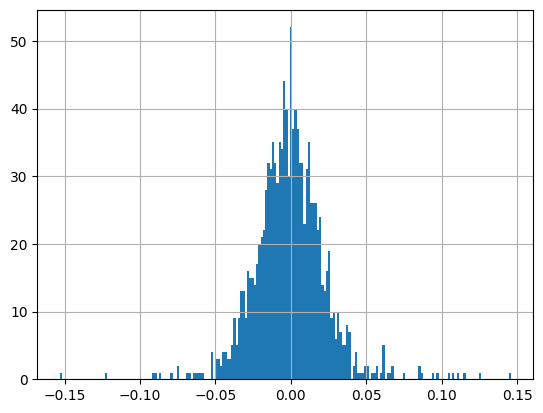

In [63]:
df_train['Daily Return'].hist(bins=200)

<Axes: xlabel='Daily Return', ylabel='Density'>

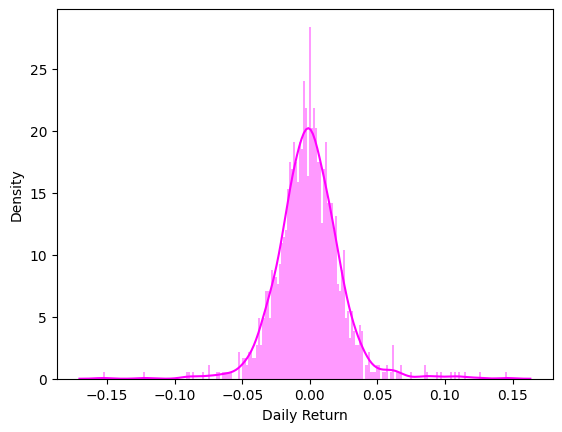

In [64]:
sns.distplot(df_train['Daily Return'].dropna(), bins=200, color='magenta')

##### Different Moving Averages

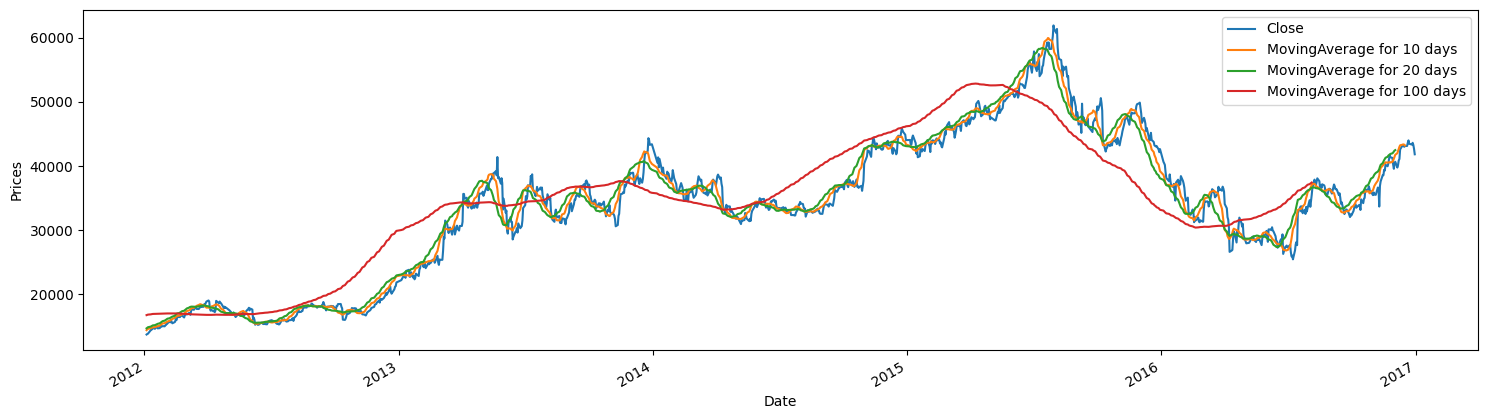

In [65]:
# Plotting several moving averages
plot_several_moving_averages(df_train, 'Close', [10, 20, 100])

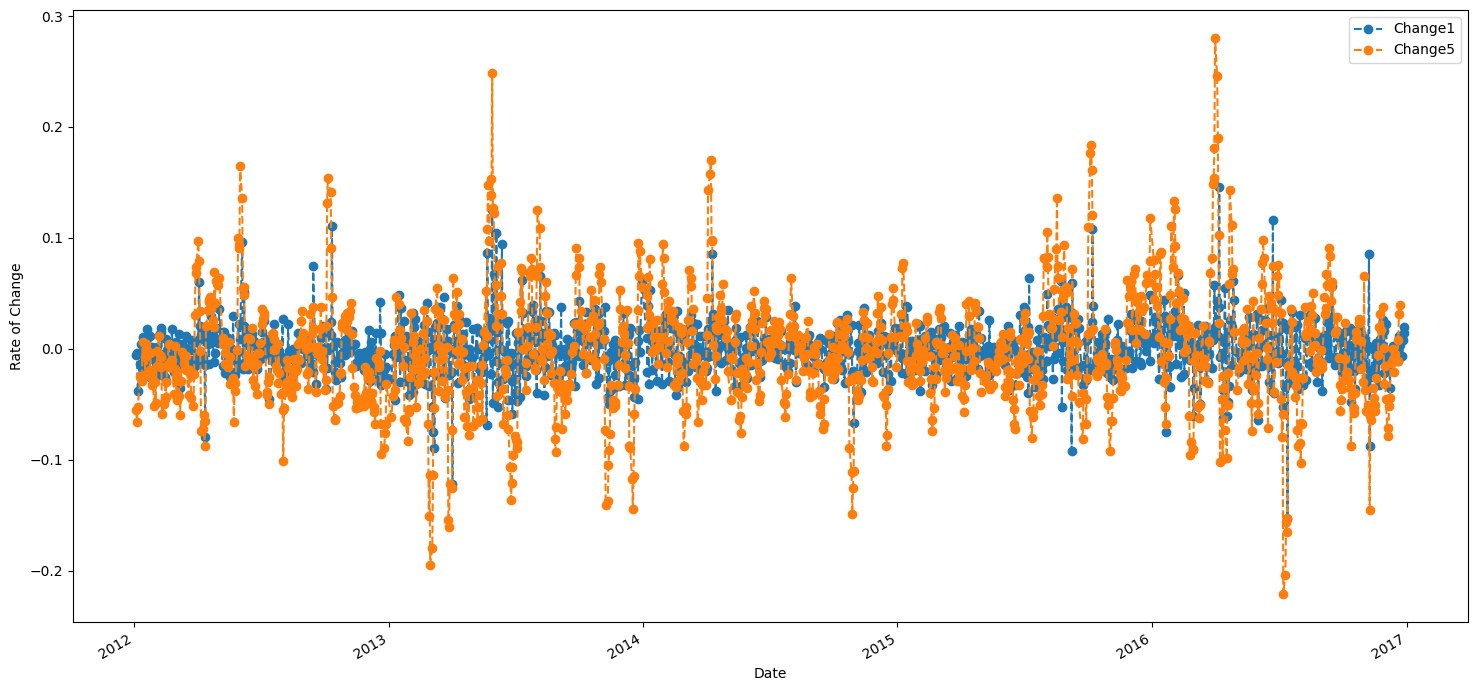

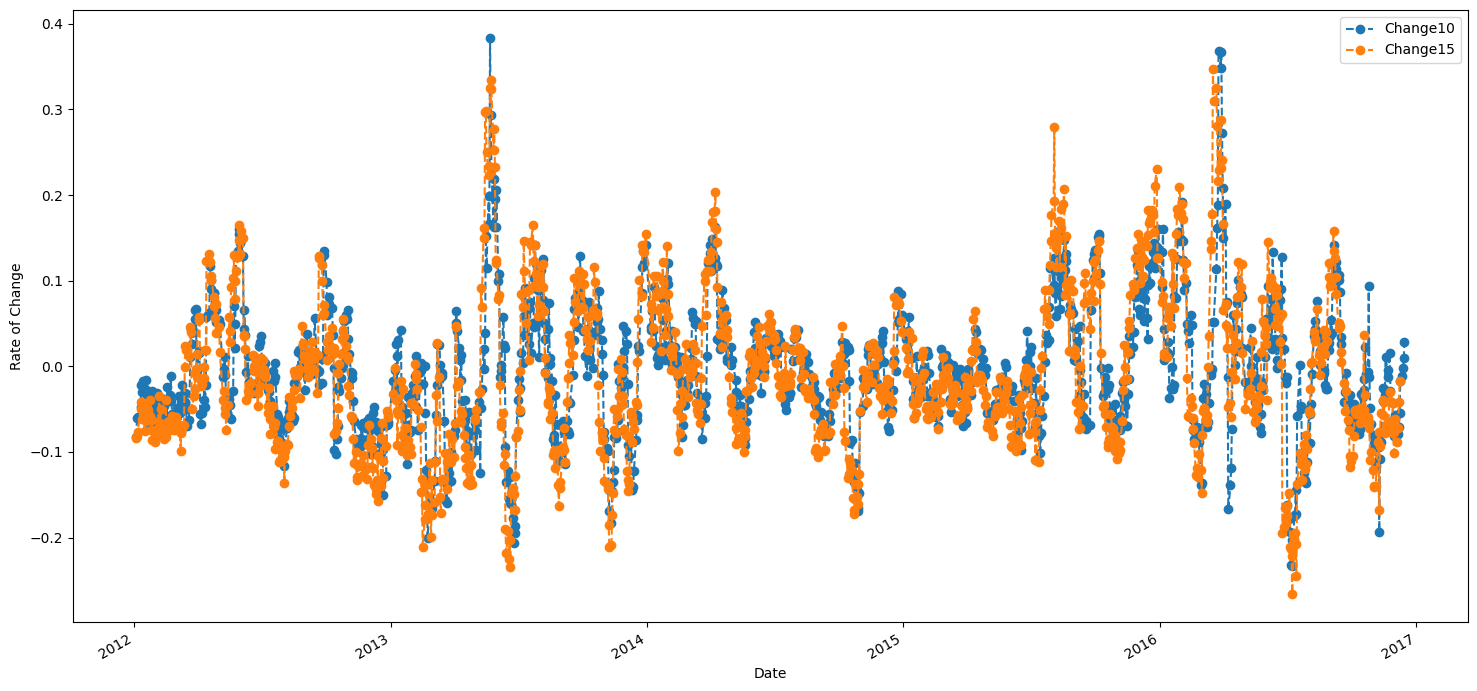

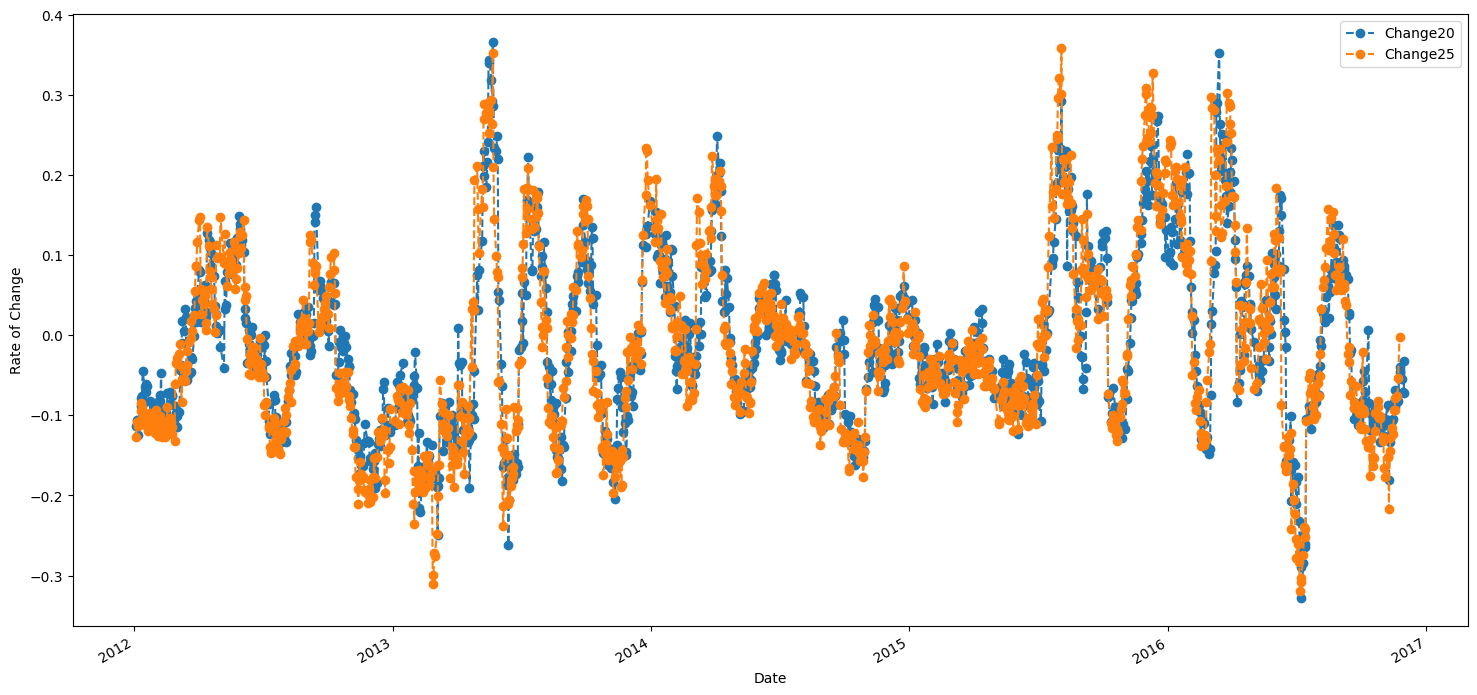

In [66]:
# Rate of Change
plot_rate_of_change(df_train, 'Close', [1, 5, 10, 15, 20, 25])

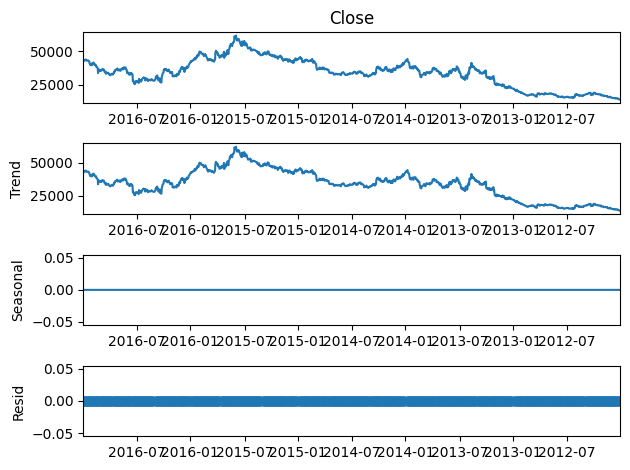

In [67]:
# Seasonal Decomposition
plot_seasonal_decomposition(df_train, 'Close')

##### Making data stationary

In [68]:
#  Function to check stationary of data using ADF(Augmented Dickey-Fuller(adfuller))
adfuller_test(df_train["Close"])


ADF Test Statistic : -0.814059222421211
p-value : 0.8149573536051891
#Lags Used : 2
Number of Observations : 1223
weak evidence against null hypothesis, indicating it is non-stationary 


In [69]:
# Convert the data to stationary form
df_train = convert_to_stationary(df_train, "Close")

In [70]:
# Test for stationarity after conversion
adfuller_test(df_train['Close First Difference'].dropna())

ADF Test Statistic : -23.012814101336104
p-value : 0.0
#Lags Used : 1
Number of Observations : 1124
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


##### Checking randomness in data

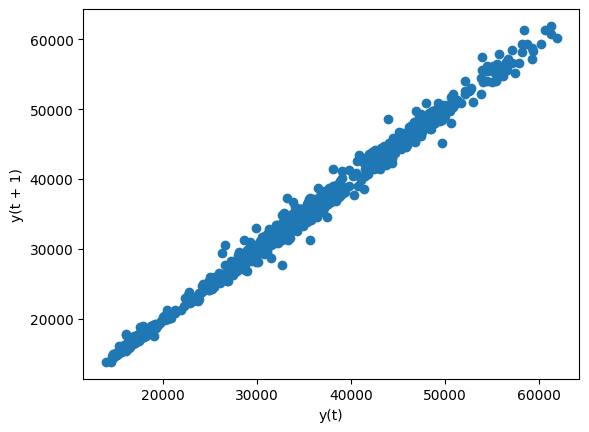

In [71]:
# Lag plot
plot_lag(df_train, 'Close')

###### Previous day data and current day data is linearly related

##### Autocorrelation and partial autocorrelation plot

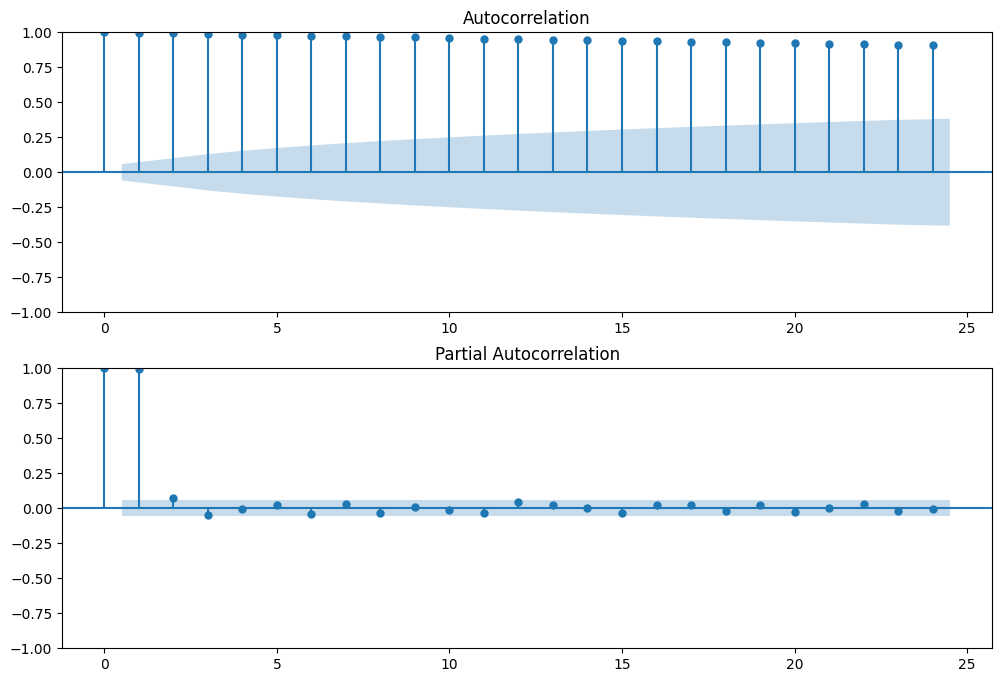

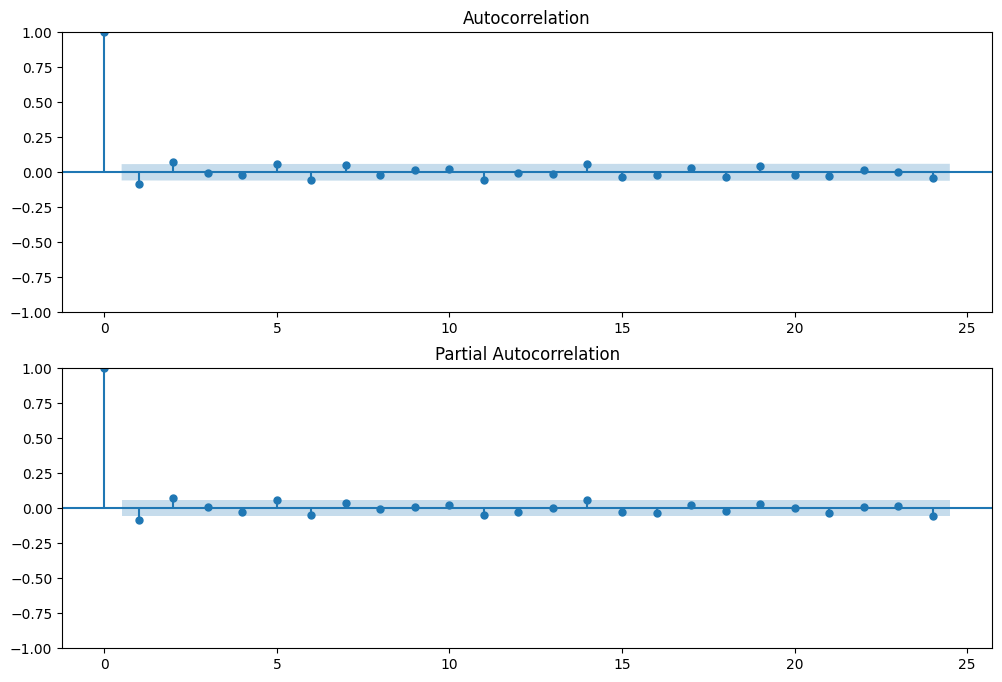

In [72]:
# First chart for non stationary data and second chart for stationary data
plot_autocorrelation(df_train, 'Close', 'Close First Difference')




#### Prophet model


In [73]:
# Prepare the data for the Prophet model
prophet_data = prepare_prophet_data(df_train, 'Close')

04:08:09 - cmdstanpy - INFO - Chain [1] start processing
04:08:10 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 4197.40
Mean Squared Error (MSE): 23576771.47
Root Mean Squared Error (RMSE): 4855.59


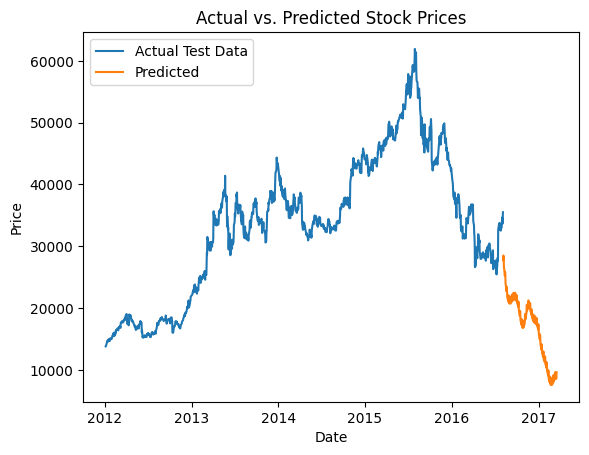

04:08:11 - cmdstanpy - INFO - Chain [1] start processing
04:08:12 - cmdstanpy - INFO - Chain [1] done processing


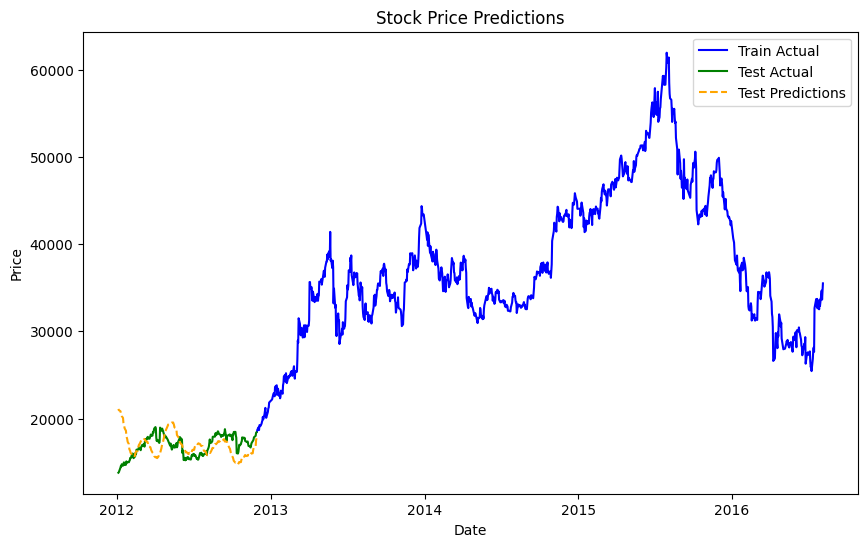

In [74]:
# Fit the Prophet model, make predictions, and plot the results
prophet_model(prophet_data)

##### LSTM model

In [75]:
train_data = df_train

In [76]:
# Define a ratio for splitting the data into training and testing datasets
train_ratio = 0.8

In [77]:
# Calculate the index to split the data
split_index = int(len(df_train) * train_ratio)

In [78]:
# Split the data into training and testing datasets
train_data = df_train[:split_index]
test_data = df_train[split_index:]

In [79]:
# Prepare the data for the LSTM model
X_train, y_train, scaler = prepare_lstm_data(train_data['Close'])


In [80]:
# Train the LSTM model
model = lstm_model(X_train, y_train)

Epoch 1/10
27/27 [==============================] - 26s 149ms/step - loss: 0.0506
Epoch 2/10
27/27 [==============================] - 4s 154ms/step - loss: 0.0100
Epoch 3/10
27/27 [==============================] - 4s 162ms/step - loss: 0.0076
Epoch 4/10
27/27 [==============================] - 4s 153ms/step - loss: 0.0077
Epoch 5/10
27/27 [==============================] - 5s 168ms/step - loss: 0.0070
Epoch 6/10
27/27 [==============================] - 4s 155ms/step - loss: 0.0070
Epoch 7/10
27/27 [==============================] - 4s 161ms/step - loss: 0.0065
Epoch 8/10
27/27 [==============================] - 4s 153ms/step - loss: 0.0060
Epoch 9/10
27/27 [==============================] - 4s 154ms/step - loss: 0.0056
Epoch 10/10
27/27 [==============================] - 5s 167ms/step - loss: 0.0055


In [81]:
# Prepare the test data
window_size = 60
dataset_total = pd.concat((train_data['Close'], test_data['Close']), axis=0)
inputs = dataset_total[len(dataset_total) - len(test_data) - window_size:].values
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(window_size, window_size + len(test_data)):
    X_test.append(inputs[i-window_size:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [82]:
# Make predictions using the LSTM model
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

8/8 [==============================] - 4s 48ms/step


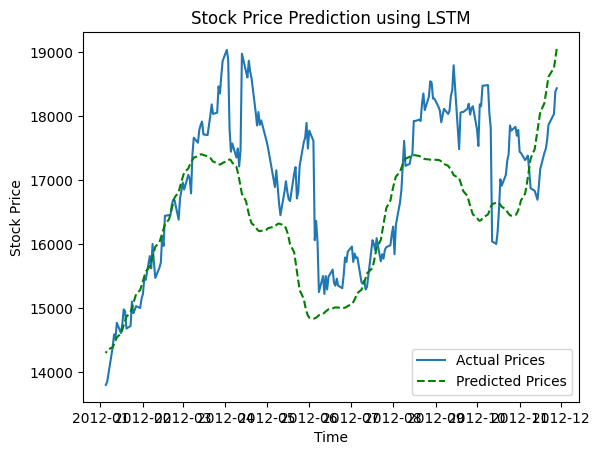

In [83]:
# Plot the results
plot_lstm_results(test_data, predicted_prices)

##### Auto regression model

In [84]:
df_1= df_train.copy()
df_1.dropna(inplace=True)

df_final = df_1.Close

In [85]:
# Fit training data on Auto Regressor model
res = fit_auto_reg(df_1, 'Close')

                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                 1126
Model:                     AutoReg(5)   Log Likelihood               -9129.248
Method:               Conditional MLE   S.D. of innovations            832.893
Date:                Wed, 26 Apr 2023   AIC                          18272.497
Time:                        04:09:26   BIC                          18307.651
Sample:                             5   HQIC                         18285.784
                                 1126                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.8674     79.095      0.314      0.753    -130.156     179.891
Close.L1       0.9226      0.030     30.926      0.000       0.864       0.981
Close.L2       0.1488      0.041      3.671      0.0

In [86]:
# Fit training data with covariance type HC0
res_cov_HC0 = fit_auto_reg_cov_HC0(df_1, 'Close')

                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                 1126
Model:                     AutoReg(5)   Log Likelihood               -9129.248
Method:               Conditional MLE   S.D. of innovations            832.893
Date:                Wed, 26 Apr 2023   AIC                          18272.497
Time:                        04:09:27   BIC                          18307.651
Sample:                             5   HQIC                         18285.784
                                 1126                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.8674     62.346      0.399      0.690     -97.328     147.063
Close.L1       0.9226      0.040     22.867      0.000       0.844       1.002
Close.L2       0.1488      0.054      2.745      0.0

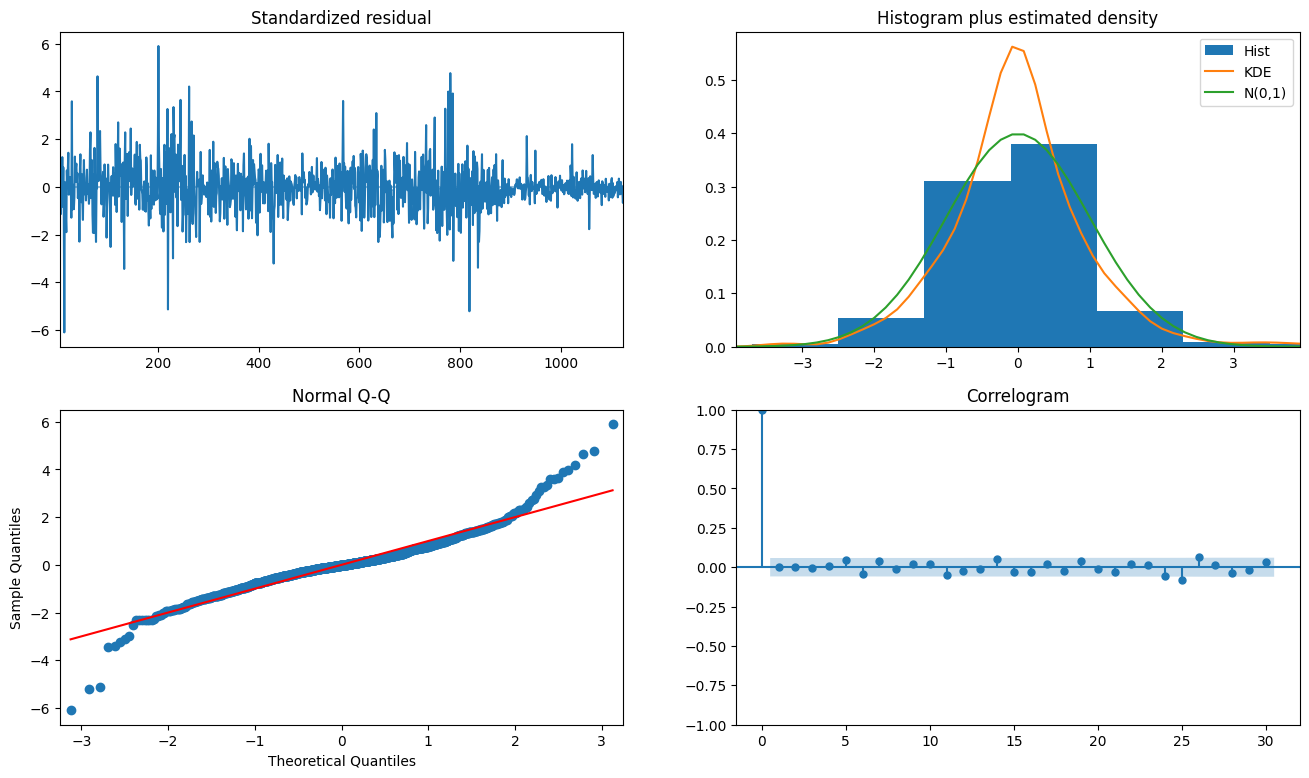

In [87]:
# Plot diagnostics of auto-regressor model
plot_auto_reg_diagnostics(res_cov_HC0)

##### Arima Model

In [88]:
# split the data into train and test
from sklearn.model_selection import train_test_split
df1_train, df1_test = train_test_split(df_final, test_size=0.2, shuffle=False)

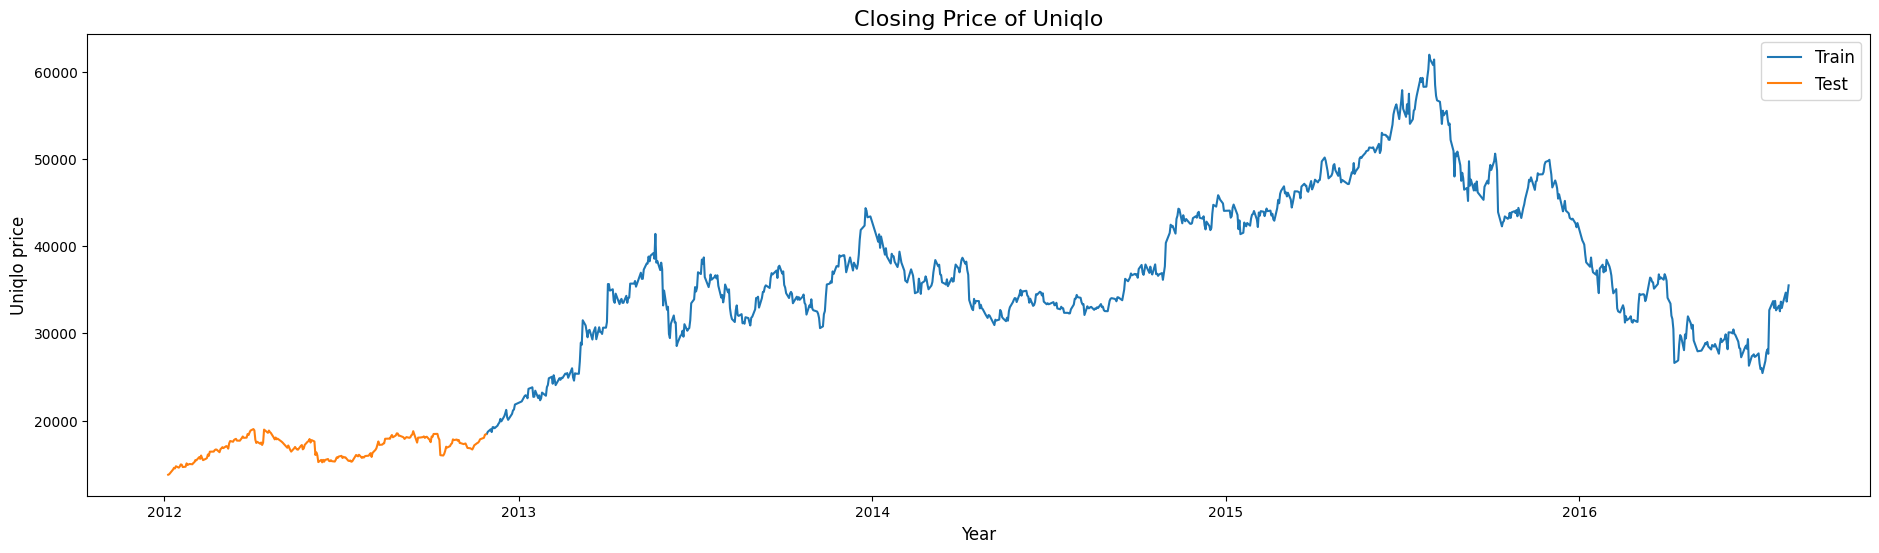

In [89]:
# plot the close variable 
fig, ax = plt.subplots(figsize=(23, 6))
ax.plot(df1_train, label='Train')
ax.plot(df1_test, label='Test')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Uniqlo price', fontsize=12)
ax.set_title('Closing Price of Uniqlo', fontsize=16)
ax.legend(fontsize=12)

In [90]:
# Fit data on Auto-Arima
import pmdarima as pm
from pmdarima.arima import auto_arima
model = auto_arima(df1_train, trace=True, error_action="ignore", suppress_warnings=True)
model.fit(df1_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=14827.050, Time=1.60 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14834.069, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14828.635, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14829.211, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14832.446, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=14830.543, Time=0.75 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=14830.747, Time=0.41 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=14827.746, Time=2.12 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=14827.851, Time=2.27 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=14829.708, Time=0.35 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=14830.989, Time=1.19 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=14830.317, Time=1.25 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=14830.790, Time=1.63 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=14825.230, Time=0.94 sec
 ARIMA(1,1,2)(0,0,0

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [91]:
# Forcast the data
forecast = model.predict(n_periods=len(df1_test))

In [92]:
# Setting date index to check the forecast
index_values =['2012-11-28', '2012-11-27', '2012-11-26', '2012-11-22',
               '2012-11-21', '2012-11-20', '2012-11-19', '2012-11-16',
               '2012-11-15', '2012-11-14', '2012-11-13', '2012-11-12', 
               '2012-11-09', '2012-11-08', '2012-11-07', '2012-11-06',
               '2012-11-05', '2012-11-02', '2012-11-01', '2012-10-31',
               '2012-10-30', '2012-10-29', '2012-10-26', '2012-10-25',
               '2012-10-24', '2012-10-23', '2012-10-22', '2012-10-19',
               '2012-10-18', '2012-10-17', '2012-10-16', '2012-10-15',
               '2012-10-12', '2012-10-11', '2012-10-10', '2012-10-09',
               '2012-10-08', '2012-10-05', '2012-10-04', '2012-10-03']
forecast1 = forecast.tolist()
Actual = df1_test.tolist()

In [93]:
# Printing the forecast and actual values 
frame = [index_values, Actual, forecast]
result = pd.DataFrame(frame)
result = result.transpose()
result.columns=['Date','Actual','Predicted'] 
result.head()

,Date,Actual,Predicted
0,2012-11-28,18430,18473.360351
1,2012-11-27,18380,18467.876915
2,2012-11-26,18030,18491.181855
3,2012-11-22,17860,18458.560999
4,2012-11-21,17620,18490.597342


In [94]:
result["Date"] = pd.to_datetime(result["Date"])
result.set_index('Date', inplace=True)

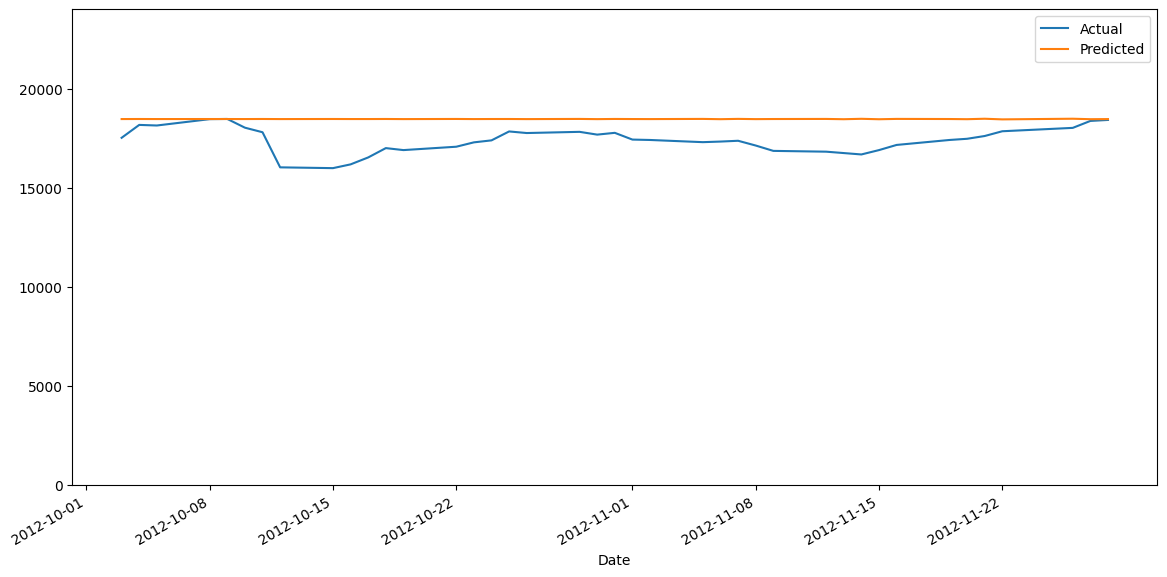

In [95]:
# Plot the forecasted values with actual values
fig, ax = plt.subplots(figsize=(14, 7))
result[["Actual", "Predicted"]].plot(ax=ax)
ax.set_ylim([0, 24000]) 
plt.show()

In [96]:
# Evaluate the model
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

# Function to get MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

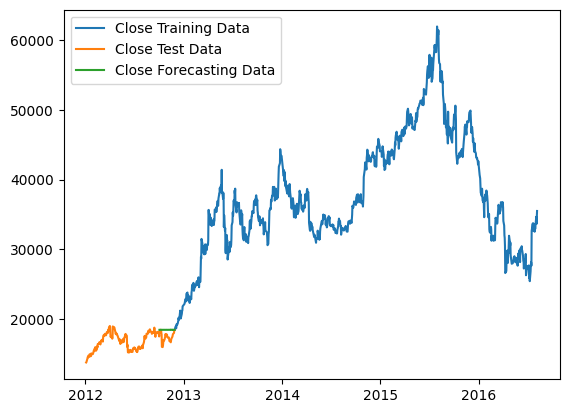

In [97]:
# Plot forcasting Close price
plt.plot(df1_train,label='Close Training Data')
plt.plot(df1_test,label='Close Test Data')
plt.plot(result['Predicted'],label='Close Forecasting Data')
plt.legend()

In [98]:
# Import evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("RMSE of ARIMA:", np.sqrt(mean_squared_error(result.Actual,result.Predicted)))
print("\nMAE of ARIMA:", mean_absolute_error(result.Actual,result.Predicted))

RMSE of ARIMA: 1961.5534764568515

MAE of ARIMA: 1596.8699026916381


In [99]:
# Calculating error for Auto-Arima without exgenous features
print("mean absoulte percentage error:", round(mean_absolute_percentage_error(result.Actual,result.Predicted),2),"%")

mean absoulte percentage error: 9.98 %
